In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(-90,90, size =1500)
lngs = np.random.uniform(-180,180, size =1500)

# Pack lats and lgns as pairs by zipping them with the zip() function
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Unzip lat_lngs to add latitudes and longitudes to a list *ensure you unzip the latitudes and longitudes into the coordinates list before moving on
coordinates = list(lat_lngs)

In [4]:
# Import citipy module
from citipy import citipy

In [5]:
# Create an empty list for holding the cities
cities = []

# Identify the nearest city for each latitude and longitude combination 
# (Iterate through the coordinates list)
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficent count
len(cities)

621

In [6]:
# Import requests library and weather API key
import requests
from config import api_key

# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [7]:
# Build the basic url for the OpenWeatherMap with api_key added
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=208373fb6fe08d264cbbc9e9b8bbcebf


In [8]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Creat counters
record_count = 1
set_count = 1

# Loop thru all the cities in our list (use enumerate() method to get the index for the city for logging purposes, and the city for creating an endpoint url)
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purpose (Open Weather Map API only allows 60 calls per minute for free tier)
    if (i % 50 == 0 and i >= 50): # if the remainder of index divided by 50 is equal to 0, and if the index is greater than or equal to 50
        set_count += 1
        record_count = 1
        time.sleep(60) # program will pause for 60 secs to avoid time out error
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+") # removing blank spaces within the city name and replacing it with +
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_maxtemp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into the city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_maxtemp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
       
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass # this will notify program to skip the error city and move on to the next city
        
# Indicate that Data loading is complete
print("----------------------------")
print("Data Retrieval Complete     ")
print("----------------------------")
            

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port lincoln
Processing Record 2 of Set 1 | arraial do cabo
Processing Record 3 of Set 1 | chuy
Processing Record 4 of Set 1 | zhuhai
Processing Record 5 of Set 1 | erenhot
Processing Record 6 of Set 1 | cayenne
Processing Record 7 of Set 1 | hamilton
Processing Record 8 of Set 1 | new norfolk
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | san quintin
Processing Record 11 of Set 1 | louisbourg
City not found. Skipping...
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | avera
Processing Record 14 of Set 1 | matagami
Processing Record 15 of Set 1 | nikolskoye
Processing Record 16 of Set 1 | bambous virieux
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | klaksvik
Processing Record 19 of Set 1 | massakory
Processing Record 20 of Set 1 | costinesti
Processing Record 21 of Set 1 | college
Processing Record 22 of Set 1 | kalabo
Pr

Processing Record 38 of Set 4 | chokurdakh
Processing Record 39 of Set 4 | roald
Processing Record 40 of Set 4 | bengkulu
Processing Record 41 of Set 4 | prince rupert
Processing Record 42 of Set 4 | halalo
City not found. Skipping...
Processing Record 43 of Set 4 | sola
Processing Record 44 of Set 4 | ponta do sol
Processing Record 45 of Set 4 | sioux lookout
Processing Record 46 of Set 4 | los llanos de aridane
Processing Record 47 of Set 4 | puerto quijarro
Processing Record 48 of Set 4 | thunder bay
Processing Record 49 of Set 4 | saleaula
City not found. Skipping...
Processing Record 50 of Set 4 | rungata
City not found. Skipping...
Processing Record 1 of Set 5 | vanimo
Processing Record 2 of Set 5 | challans
Processing Record 3 of Set 5 | paita
Processing Record 4 of Set 5 | cabedelo
Processing Record 5 of Set 5 | lermontovka
Processing Record 6 of Set 5 | talnakh
Processing Record 7 of Set 5 | berlevag
Processing Record 8 of Set 5 | semenivka
Processing Record 9 of Set 5 | mrirt

Processing Record 22 of Set 8 | atambua
Processing Record 23 of Set 8 | souillac
Processing Record 24 of Set 8 | acarau
Processing Record 25 of Set 8 | kirkland lake
Processing Record 26 of Set 8 | haines junction
Processing Record 27 of Set 8 | santa maria del oro
Processing Record 28 of Set 8 | altamira
Processing Record 29 of Set 8 | altay
Processing Record 30 of Set 8 | simao
Processing Record 31 of Set 8 | kyra
Processing Record 32 of Set 8 | cap-aux-meules
Processing Record 33 of Set 8 | faya
Processing Record 34 of Set 8 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 35 of Set 8 | nemours
Processing Record 36 of Set 8 | svetlaya
Processing Record 37 of Set 8 | rafaela
Processing Record 38 of Set 8 | buritis
Processing Record 39 of Set 8 | severnoye
Processing Record 40 of Set 8 | prainha
Processing Record 41 of Set 8 | magna
Processing Record 42 of Set 8 | marcona
City not found. Skipping...
Processing Record 43 of Set 8 | zarichne
Processing Record 44 of Set

Processing Record 12 of Set 12 | dandong
Processing Record 13 of Set 12 | cascais
Processing Record 14 of Set 12 | ugoofaaru
Processing Record 15 of Set 12 | inongo
Processing Record 16 of Set 12 | tecpatan
Processing Record 17 of Set 12 | maceio
Processing Record 18 of Set 12 | jiujiang
Processing Record 19 of Set 12 | smithers
Processing Record 20 of Set 12 | gartringen
Processing Record 21 of Set 12 | los andes
Processing Record 22 of Set 12 | bodden town
Processing Record 23 of Set 12 | keetmanshoop
Processing Record 24 of Set 12 | tsihombe
City not found. Skipping...
Processing Record 25 of Set 12 | poso
Processing Record 26 of Set 12 | marana
Processing Record 27 of Set 12 | greeneville
Processing Record 28 of Set 12 | mehamn
Processing Record 29 of Set 12 | kupino
Processing Record 30 of Set 12 | tidore
City not found. Skipping...
Processing Record 31 of Set 12 | russell
Processing Record 32 of Set 12 | manokwari
Processing Record 33 of Set 12 | ibra
Processing Record 34 of Set 

In [9]:
len(city_data)

568

In [10]:
# Convert the array of dictionaries into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Lincoln,-34.7333,135.8667,56.30,86,11,7.90,AU,2022-10-01 16:53:47
1,Arraial Do Cabo,-22.9661,-42.0278,75.16,64,40,17.27,BR,2022-10-01 16:53:47
2,Chuy,-33.6971,-53.4616,64.65,63,18,9.55,UY,2022-10-01 16:51:12
3,Zhuhai,22.2769,113.5678,82.18,89,40,12.66,CN,2022-10-01 16:50:31
4,Erenhot,43.6475,111.9767,62.04,45,19,9.75,CN,2022-10-01 16:53:47
5,Cayenne,4.9333,-52.3333,91.44,49,75,14.97,GF,2022-10-01 16:53:48
6,Hamilton,39.1834,-84.5333,70.88,44,0,16.11,US,2022-10-01 16:48:57
7,New Norfolk,-42.7826,147.0587,44.71,73,10,3.42,AU,2022-10-01 16:53:48
8,Butaritari,3.0707,172.7902,81.52,76,100,15.46,KI,2022-10-01 16:53:49
9,San Quintin,30.4833,-115.9500,68.99,72,96,7.43,MX,2022-10-01 16:53:49


In [11]:
# Reorder dataframe columns
new_col_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_col_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Lincoln,AU,2022-10-01 16:53:47,-34.7333,135.8667,56.30,86,11,7.90
1,Arraial Do Cabo,BR,2022-10-01 16:53:47,-22.9661,-42.0278,75.16,64,40,17.27
2,Chuy,UY,2022-10-01 16:51:12,-33.6971,-53.4616,64.65,63,18,9.55
3,Zhuhai,CN,2022-10-01 16:50:31,22.2769,113.5678,82.18,89,40,12.66
4,Erenhot,CN,2022-10-01 16:53:47,43.6475,111.9767,62.04,45,19,9.75
5,Cayenne,GF,2022-10-01 16:53:48,4.9333,-52.3333,91.44,49,75,14.97
6,Hamilton,US,2022-10-01 16:48:57,39.1834,-84.5333,70.88,44,0,16.11
7,New Norfolk,AU,2022-10-01 16:53:48,-42.7826,147.0587,44.71,73,10,3.42
8,Butaritari,KI,2022-10-01 16:53:49,3.0707,172.7902,81.52,76,100,15.46
9,San Quintin,MX,2022-10-01 16:53:49,30.4833,-115.9500,68.99,72,96,7.43


In [12]:
# Create the output file (CSV)
output_file = "weather_data/cities.csv"

# Export the city_data into the CSV
city_data_df.to_csv(output_file, index_label = "City_ID") # Column A in csv will be "City_ID"

In [13]:
# PLOTTING LATITUDE VS OTHER VARIABLES

# Extract relevant field from the dataframe above for plotting

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

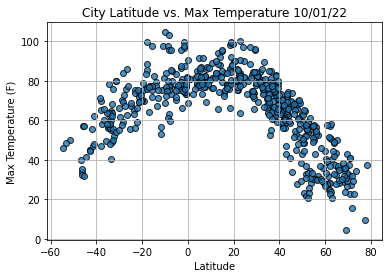

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temp
plt.scatter(lats,
            max_temps,
            edgecolor = "black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Set title, x & y label, and grid
plt.title(f"City Latitude vs. Max Temperature " +time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

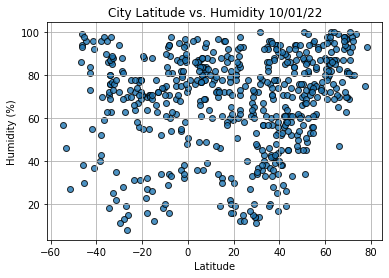

In [15]:
# Build the scatter plot for latitude vs. humidity (repurpose previous code)
plt.scatter(lats,
            humidity,
            edgecolor = "black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Set title, x & y label, and grid
plt.title(f"City Latitude vs. Humidity " +time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

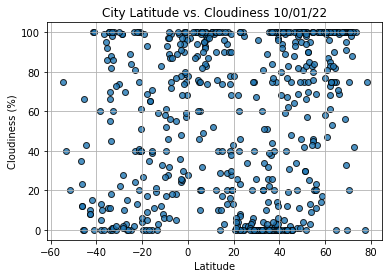

In [16]:
# Build the scatter plot for latitude vs. cloudiness (repurpose previous code)
plt.scatter(lats,
            cloudiness,
            edgecolor = "black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Set title, x & y label, and grid
plt.title(f"City Latitude vs. Cloudiness " +time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

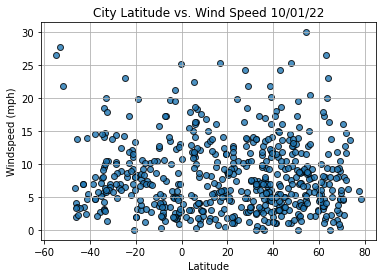

In [17]:
# Build the scatter plot for latitude vs. windspeed (repurpose previous code)
plt.scatter(lats,
            wind_speed,
            edgecolor = "black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Set title, x & y label, and grid
plt.title(f"City Latitude vs. Wind Speed " +time.strftime("%x"))
plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()

In [18]:
# LINEAR REGRESSION

# Import linregress
from scipy.stats import linregress

In [56]:
# Create a function to create perform linear regression on the weather data & plot a regression line and the equation with the data
def plot_linear_regression(x_values,y_values,title,y_label,text_coordinates):
    
    # Run regression on hemisphere weather data (North and South)
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    
    # Show plot
    plt.show()
    
    # Check r values
    print(f"The r_value is {r_value:.3f}")

In [57]:
# CREATE HEMISHPERE DATAFRAMES

# Create a dataframe with all data fitting the Northern Hemisphere criteria (lat >= 0)
northern_hem_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

northern_hem_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Zhuhai,CN,2022-10-01 16:50:31,22.2769,113.5678,82.18,89,40,12.66
4,Erenhot,CN,2022-10-01 16:53:47,43.6475,111.9767,62.04,45,19,9.75
5,Cayenne,GF,2022-10-01 16:53:48,4.9333,-52.3333,91.44,49,75,14.97
6,Hamilton,US,2022-10-01 16:48:57,39.1834,-84.5333,70.88,44,0,16.11
8,Butaritari,KI,2022-10-01 16:53:49,3.0707,172.7902,81.52,76,100,15.46


In [58]:
# Create a dataframe with all data fitting the Southern Hemisphere criteria (lat < 0)
southern_hem_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

southern_hem_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Lincoln,AU,2022-10-01 16:53:47,-34.7333,135.8667,56.30,86,11,7.90
1,Arraial Do Cabo,BR,2022-10-01 16:53:47,-22.9661,-42.0278,75.16,64,40,17.27
2,Chuy,UY,2022-10-01 16:51:12,-33.6971,-53.4616,64.65,63,18,9.55
7,New Norfolk,AU,2022-10-01 16:53:48,-42.7826,147.0587,44.71,73,10,3.42
10,Busselton,AU,2022-10-01 16:53:49,-33.6500,115.3333,54.82,86,45,14.67


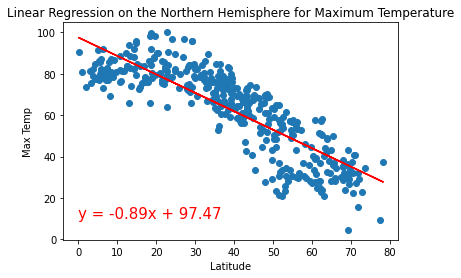

The r_value is -0.844


In [59]:
# LINEAR REGRESSION - NORTHERN HEMI MAX TEMP

x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Max Temp"]

# Call the plot_linear_regression function create previously
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp', (0,10))

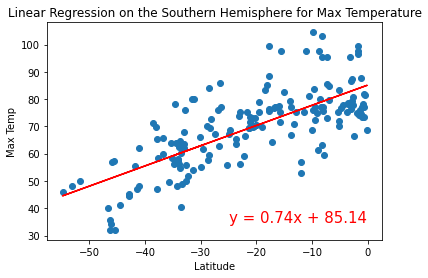

The r_value is 0.728


In [60]:
# LINEAR REGRESSION - SOUTHERN HEMI MAX TEMP

x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Max Temp"]

# Call the plot_linear_regression function create previously
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Max Temperature', 'Max Temp', (-25,35))

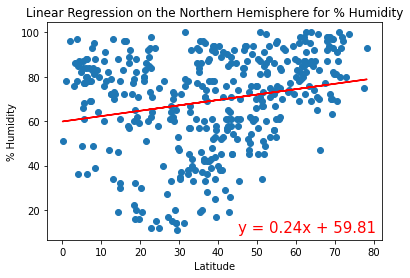

The r_value is 0.216


In [63]:
# LINEAR REGRESSION - NORTHERN HEMI HUMIDITY
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Humidity"]

# Call the plot_linear_regression function create previously
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity', (45,10))

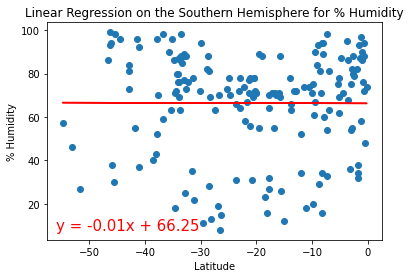

The r_value is -0.004


In [64]:
# LINEAR REGRESSION - SOUTHERN HEMI HUMIDITY
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Humidity"]

# Call the plot_linear_regression function create previously
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity', (-56,8))

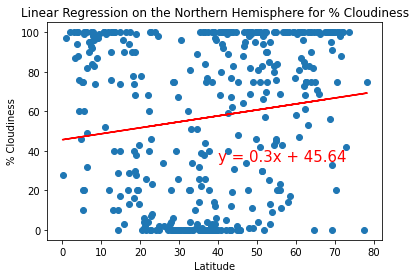

The r_value is 0.146


In [67]:
# LINEAR REGRESSION - NORTHERN HEMI % CLOUDY
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Cloudiness"]

# Call the plot_linear_regression function create previously
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness', (40,35))

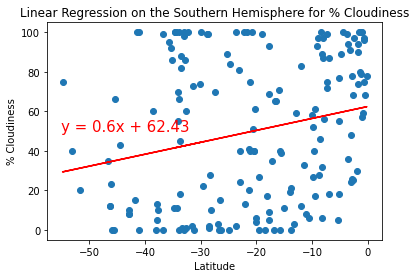

The r_value is 0.232


In [70]:
# LINEAR REGRESSION - SOUTHERN HEMI % CLOUDY
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Cloudiness"]

# Call the plot_linear_regression function create previously
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness', (-55,50))

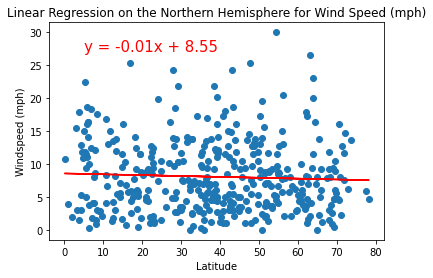

The r_value is -0.047


In [73]:
# LINEAR REGRESSION - NORTHERN HEMI WIND SPEED
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Wind Speed"]

# Call the plot_linear_regression function create previously
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed (mph)', 'Windspeed (mph)', (5,27))

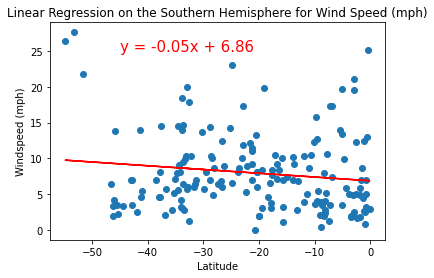

The r_value is -0.137


In [75]:
# LINEAR REGRESSION - SOUTHERN HEMI WIND SPEED
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Wind Speed"]

# Call the plot_linear_regression function create previously
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed (mph)', 'Windspeed (mph)', (-45,25))